In [2]:
#downloading libraries
import pandas as pd 
import numpy as np
import matplotlib as plt
import pandas as pd
import nltk
import re
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
from collections import Counter

#nltk.download()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Abhishek's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhishek's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
#loading data containing comments and their classes
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
data['comment_text'][14799]

'you fucking harry potter gay porn!!!!!!! sucking asshole morhone'

0          264
1          112
2          233
3          622
4           67
5           65
6           44
7          115
8          472
9           70
10        2875
11          56
12         319
13         819
14         219
15         610
16          57
17          48
18         118
19         440
20         266
21          58
22         543
23          97
24        1409
25         172
26         288
27         343
28         119
29          78
          ... 
159541     346
159542     164
159543      80
159544      19
159545     105
159546     534
159547      30
159548      27
159549      25
159550     173
159551     196
159552      92
159553     888
159554     182
159555     119
159556      57
159557     429
159558     134
159559     357
159560    1889
159561    1147
159562    1015
159563     394
159564     369
159565     653
159566     295
159567      99
159568      81
159569     116
159570     189
Name: comment_text, Length: 159571, dtype: int64


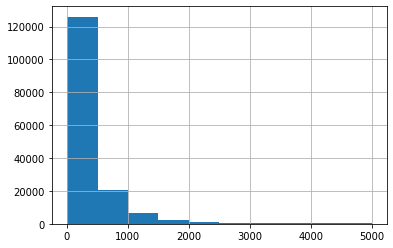

In [4]:
#drawing histogram of the length of our comments 
lens = data.comment_text.str.len()
print(lens)
lens.hist()

In [5]:
#extracting comments out of data containing comments and classes of comments
def loadingData(fName): 
    data = pd.read_csv(fName)   #reading data
    print("Data Type :", data.dtypes)
    print("Colums of Data :", data.columns)
    print("Index of Data", data.index)
    data = data.iloc[:,1]
    data.head()
    return data
    
comments = loadingData("train.csv")    

Data Type : id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object
Colums of Data : Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')
Index of Data RangeIndex(start=0, stop=159571, step=1)


In [6]:
#adding a column constituting the none class for those comments that are not a part of any class(0 in all columns)
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data['none'] = 1-data[label_cols].max(axis=1)
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
all_text2 = ' '.join(comments)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [8]:
#getting the classes out of our data which our model has to predict using the comments
label_col=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','none']
y=data[label_col]

In [9]:
#one hot encoding our comments in the form of a bag of words
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print (vocab_to_int)
comments_int = []
for comment in comments:
    r = [vocab_to_int[w] for w in comment.split()]
    comments_int.append(r)
y

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,1,1,1,0,1,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1


In [10]:
#converting that list into a numpy array
encoded_labels = np.array(y)
encoded_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

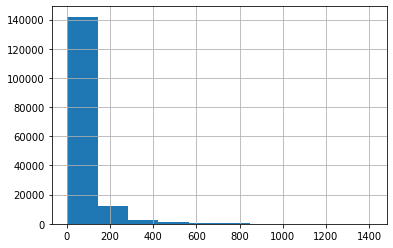

count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
dtype: float64

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
comments_len = [len(x) for x in comments_int]
pd.Series(comments_len).hist()
plt.show()
pd.Series(comments_len).describe()

['was', 'we', 'this', 'there', 'ma', 'she', 'themselves', 'can', 'own', 'will', "needn't", "she's", 'on', 'myself', 'how', 'shouldn', 've', "it's", 'do', 'wouldn', 'had', "you're", 'whom', 'then', 'needn', 'my', 'd', 'have', 'herself', "won't", 'her', 'too', 'because', 'these', 'a', 'just', 'having', 'your', 'which', 'during', 'above', 'in', 't', 'yours', 'hers', "didn't", 'into', 'than', 'he', 'theirs', 'each', 'some', 'am', "wasn't", 'should', 'only', 'won', 'both', 'that', "you'd", 'himself', 'why', 'me', 'doing', 'any', 'aren', 'being', 'few', "aren't", 'all', 'are', 'and', 'y', 'through', 'again', 'below', 'same', 'yourselves', 'those', 'mustn', 'where', "you'll", 'him', 'with', 'as', 'yourself', "doesn't", 's', 'i', 'now', 'no', 'his', 'they', "mustn't", "hadn't", 'after', "mightn't", 'so', 'ourselves', 'for', 'before', "shan't", 'weren', 'what', 'hadn', 'but', 'more', 'mightn', "weren't", 'has', 'from', 'or', 're', 'under', 'it', 'been', 'ain', 'between', 'if', "wouldn't", 'whil

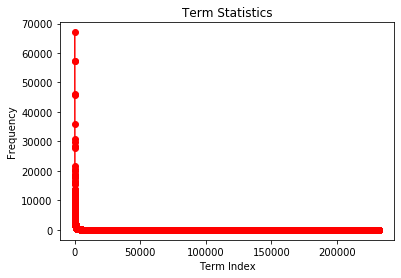

In [12]:
#tokenising our comments and plotting their term indexes 
def preProcessData(dataa):
    stopwords_en = list(set(stopwords.words('english')))
    def split(word): 
        return [char for char in word]   
    punchList = split(punctuation)

    print(stopwords_en)
    print('Punctuation :', punchList)

    wordTokenList = [word_tokenize(sent) for sent in dataa]
    lowercasingList = [[word.lower() for word in sentence] for sentence in wordTokenList]
    noStopWordList = [[word for word in sentence if word not in stopwords_en] for sentence in lowercasingList]
    noPunchList = [[re.sub(r'([^\s\w]|_)+', '', word) for word in sentence] for sentence in noStopWordList]
    #noPunchList = [[word for word in sentence if word not in punchList] for sentence in noStopWordList]
    PP_data = [[word for word in sentence if word] for sentence in noPunchList]
    return PP_data

PP_data = preProcessData(comments)

def wordStatsAndPlot(PP_data):
    wordList=[]
    for sent in PP_data:
        for word in sent:
            wordList.append(word)
    print ("Sample Word List :", wordList[:10])
    print("=================================================")
    counter = Counter(wordList)
    print("Total Number of words :", len(wordList))
    print("Total Number Unique of words :", len(list(set(wordList))))
    print ("Most Frequent 30 words :", counter.most_common(30))
    
    wordPlotList, wordIndexList, freqList = [], [], [] 
    count = 0
    for word, freq in counter.most_common(len(set(wordList))):
        wordPlotList.append(word)
        wordIndexList.append(count)
        freqList.append(freq)
        count += 1   
        
    plt.title('Term Statistics')
    plt.xlabel('Term Index')
    plt.ylabel('Frequency')
    plt.plot(wordIndexList, freqList, 'ro-')
    #plt.gca().legend(('Train_Avg_MSE','Test_Avg_MSE'))
    #plt.savefig('lembdaVsAvg_MSE_part-'+str(parti)+'.png')
    plt.show()
    
wordStatsAndPlot(PP_data)  

In [12]:

comments_int = [ comments_int[i] for i, l in enumerate(comments_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(comments_len) if l> 0 ]
encoded_labels

[array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 1, 1, 0, 1, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dt

In [73]:
#making all our one hot coded representations of our comments to be of equal length by padding our shorter commets and cutting short our longer ones
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features
features=pad_features(comments_int,200)

In [74]:
print (features.shape[0])
def convert_array(data):
    array_y=np.array([np.array(xi) for xi in data])
    return array_y

159571


In [75]:
#train test and validation splitting
split_frac = 0.8
len_feat=features.shape[0]
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [76]:

train_y = convert_array(train_y)
remaining_y = convert_array(remaining_y)
valid_y = convert_array(valid_y)
test_y = convert_array(test_y)

In [17]:
from keras.layers import Dense, Dropout, Flatten  
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras.preprocessing.image import load_img


from keras import optimizers

Using TensorFlow backend.


In [137]:
#setting up a deep neural network
model = Sequential()    
model.add(Dense(256, activation='relu')) 
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax')) 

In [138]:
model.compile(loss=keras.losses.categorical_crossentropy,  
       optimizer=keras.optimizers.Adadelta(),       
       metrics=['accuracy'])

In [140]:
toxicity=model.fit(train_x,train_y,batch_size=100,epochs=10,validation_data=(valid_x,valid_y ))  

Train on 127656 samples, validate on 15957 samples
Epoch 1/10
127656/127656 [==============================] - 3s 26us/step - loss: 0.8586 - acc: 0.8982 - val_loss: 0.8424 - val_acc: 0.9006
Epoch 2/10
127656/127656 [==============================] - 3s 26us/step - loss: 0.8573 - acc: 0.8982 - val_loss: 0.8421 - val_acc: 0.9006
Epoch 3/10
127656/127656 [==============================] - 3s 24us/step - loss: 0.8559 - acc: 0.8982 - val_loss: 0.8436 - val_acc: 0.9006
Epoch 4/10
127656/127656 [==============================] - 3s 25us/step - loss: 0.8556 - acc: 0.8982 - val_loss: 0.8477 - val_acc: 0.9006
Epoch 5/10
127656/127656 [==============================] - 3s 25us/step - loss: 0.8572 - acc: 0.8982 - val_loss: 0.8494 - val_acc: 0.9006
Epoch 6/10
127656/127656 [==============================] - 3s 25us/step - loss: 0.8570 - acc: 0.8982 - val_loss: 0.8449 - val_acc: 0.9006
Epoch 7/10
127656/127656 [==============================] - 3s 25us/step - loss: 0.8563 - acc: 0.8982 - val_loss: 0

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               51456     
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 7)                 455       
Total params: 93,063
Trainable params: 93,063
Non-trainable params: 0
_________________________________________________________________


In [142]:
#accuracy on our test set
score = model.evaluate(test_x, test_y, verbose=0)  
print('Test loss:', score[0])  
print('Test accuracy:', score[1])

Test loss: 0.8644862129569039
Test accuracy: 0.8972928938239361


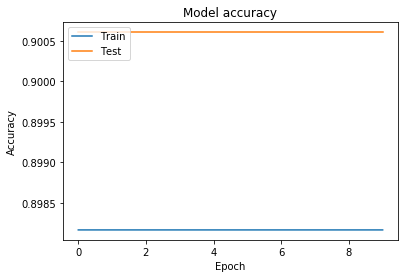

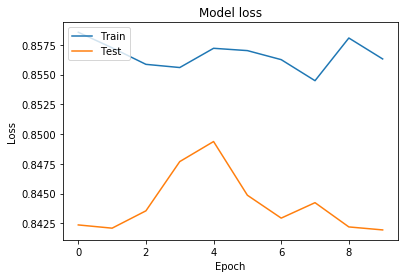

In [143]:
#plotting test and train accuracy and loss with epochs
import matplotlib.pyplot as plt

#  Plot training & validation accuracy values
plt.plot(toxicity.history['acc'])
plt.plot(toxicity.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(toxicity.history['loss'])
plt.plot(toxicity.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [115]:
#reshaping our comment arrays inorder to work with lstms
import numpy as np
def reshaper(t_x):
    x = np.reshape(t_x, (t_x.shape[0], 1, t_x.shape[1]))
    return x

# test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
# valid_x = np.reshape(valid_x, (valid_x.shape[0], 1, valid_x.shape[1]))
# train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
re_train_x=reshaper(train_x)
re_valid_x=reshaper(valid_x)
re_test_x=reshaper(test_x)

In [116]:
#reducing our input as larger input was initially taking too much time
def set_reducer(rx,n):
    set_x=rx[0:round(rx.shape[0]/n)]
    return set_x
# set_x=re_train_x[0:round(re_train_x.shape[0]/3)]
# set_y=train_y[0:round(train_y.shape[0]/3)]
# val_set_x=re_valid_x[0:round(re_valid_x.shape[0]/3)]
# val_set_y=valid_y[0:round(valid_y.shape[0]/3)]
set_x=set_reducer(re_train_x,1)
set_y=set_reducer(train_y,1)
val_set_x=set_reducer(re_valid_x,1)
val_set_y=set_reducer(valid_y,1)

In [131]:
#constructing out lstm model
from keras.layers import SimpleRNN,Embedding,LSTM,Dropout

model = Sequential()
model.add(LSTM(256,input_shape=(1,200),return_sequences=False))#True = many to many
model.add(Dropout(0.3))
model.add(Dense(128,kernel_initializer='normal',activation='linear'))
# model.add(Dense(64,kernel_initializer='normal',activation='linear'))
# model.add(Dense(32,kernel_initializer='normal',activation='sigmoid'))
model.add(Dense(7,kernel_initializer='normal',activation='linear'))
model.compile(loss='mse',optimizer ='adam',metrics=['accuracy'])
# scores = model.evaluate(train_x[0:5],train_y[0:5],verbose=1,batch_size=1)

In [132]:
# validation_split=0.05,
toxicity=model.fit(set_x,set_y,epochs=10,batch_size=100,verbose=1,validation_data=(val_set_x,val_set_y ));

Train on 127656 samples, validate on 15957 samples
Epoch 1/10
127656/127656 [==============================] - 14s 111us/step - loss: 0.0464 - acc: 0.8916 - val_loss: 0.0418 - val_acc: 0.9006
Epoch 2/10
127656/127656 [==============================] - 12s 96us/step - loss: 0.0428 - acc: 0.8982 - val_loss: 0.0417 - val_acc: 0.9006
Epoch 3/10
127656/127656 [==============================] - 12s 96us/step - loss: 0.0426 - acc: 0.8982 - val_loss: 0.0421 - val_acc: 0.9006
Epoch 4/10
127656/127656 [==============================] - 13s 99us/step - loss: 0.0425 - acc: 0.8982 - val_loss: 0.0415 - val_acc: 0.9006
Epoch 5/10
127656/127656 [==============================] - 13s 101us/step - loss: 0.0424 - acc: 0.8982 - val_loss: 0.0414 - val_acc: 0.9006
Epoch 6/10
127656/127656 [==============================] - 13s 101us/step - loss: 0.0424 - acc: 0.8982 - val_loss: 0.0415 - val_acc: 0.9006
Epoch 7/10
127656/127656 [==============================] - 14s 107us/step - loss: 0.0424 - acc: 0.8982 - 

In [133]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 256)               467968    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_46 (Dense)             (None, 7)                 903       
Total params: 501,767
Trainable params: 501,767
Non-trainable params: 0
_________________________________________________________________
None


In [134]:
#accuracy on our lstm dnn
score = model.evaluate(re_test_x, test_y, verbose=0)  
print('Test loss:', score[0])  
print('Test accuracy:', score[1])


Test loss: 0.042854091369417736
Test accuracy: 0.8972928938239361


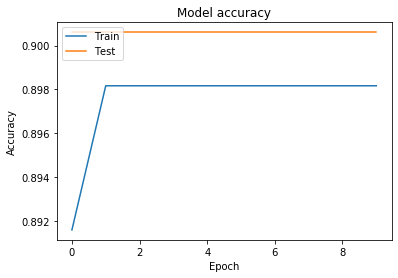

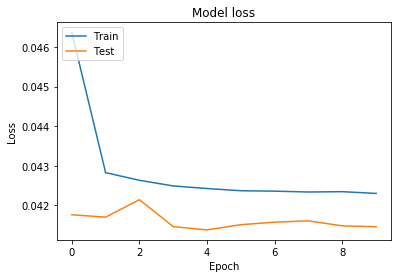

In [135]:
#plotting test and train accuracy and loss with epochs
import matplotlib.pyplot as plt

#  Plot training & validation accuracy values
plt.plot(toxicity.history['acc'])
plt.plot(toxicity.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(toxicity.history['loss'])
plt.plot(toxicity.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.layers